# Car Price Prediction

Next, we are going to work with Car Price Prediction database, to predict the
price of a car based on its characteristics.

The database contains 4879 training examples. Because we don't have a testing
dataset, we will use the cross validation technique to validate the parameters
of the methods we are going to use.

The first 4 training examples can be seen in the table below:

Year | Kilometers_driven | Fuel_type | Transmission | Owner_type |   Mileage  | Engine  |   Power   | Seats | Price |
:---:|:-----------------:|:----------|:-------------|:-----------|:----------:|:-------:|:---------:|:-----:|------:|
2010 |       72000       |    CNG    |    Manual    |    First   | 26.6 km/kg | 998 CC  | 58.16 bhp |   5   | 1.75  |
2012 |       87000       |   Diesel  |    Manual    |    First   | 20.77 kmpl | 1248 CC | 88.76 bhp |   7   |   6   |
2013 |       40670       |   Diesel  |   Automatic  |    Second  | 15.2 kmpl  | 1968 CC | 140.8 bhp |   5   | 17.74 |
2012 |       75000       |    LPG    |    Manual    |    First   | 21.1 km/kg | 814 CC  | 55.2 bhp  |   5   | 2.35  |


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression, Ridge

plt.style.use('default')

In [2]:
# load training data
training_data = np.load('data/training_data.npy')
prices = np.load('data/prices.npy')

# print the first 4 samples
print('The first 4 samples are:\n ', training_data[:4])
print('The first 4 prices are:\n ', prices[:4])

# shuffle
training_data, prices = shuffle(training_data, prices, random_state=0)

The first 4 samples are:
  [[2.0150e+03 4.1000e+04 1.9670e+01 1.5820e+03 1.2620e+02 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0110e+03 4.6000e+04 1.8200e+01 1.1990e+03 8.8700e+01 5.0000e+00
  1.0000e+00 0.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0120e+03 8.7000e+04 2.0770e+01 1.2480e+03 8.8760e+01 7.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]
 [2.0130e+03 8.6999e+04 2.3080e+01 1.4610e+03 6.3100e+01 5.0000e+00
  1.0000e+00 0.0000e+00 1.0000e+00 0.0000e+00 0.0000e+00 0.0000e+00
  1.0000e+00 0.0000e+00]]
The first 4 prices are:
  [12.5  4.5  6.   3.5]


### Exercise 1

Define a function that takes as parameter the training data
and returns the scaled data.

In [3]:
def normalize_data(train_data):
  scaler = StandardScaler()
  scaler.fit(train_data)

  scaled_train_data = scaler.transform(train_data)

  return scaled_train_data

### Exercise 2

Using the training data from the Car Price Prediction dataset, train a linear regression model
using cross-validation with 3 folds. Calculate the mean value of MSE and MAE.

In [4]:
s_train_x = normalize_data(training_data)

In [5]:
model = LinearRegression()
results_cv = cross_validate(model, s_train_x, prices, cv=3,
                        scoring=('neg_mean_squared_error', 'neg_mean_absolute_error'))
results_cv

{'fit_time': array([0., 0., 0.]),
 'score_time': array([0., 0., 0.]),
 'test_neg_mean_squared_error': array([-3.10474849, -3.22105932, -3.17652869]),
 'test_neg_mean_absolute_error': array([-1.30672288, -1.3312304 , -1.32087469])}

In [6]:
print(np.abs(results_cv['test_neg_mean_squared_error'].mean()))
print(np.abs(results_cv['test_neg_mean_absolute_error'].mean()))

3.167445500691732
1.3196093241373699


### Exercise 3

Using the training data from the Car Price Prediction dataset, train a Ridge regression model
using cross-validation with 3 folds. Calculate the mean value of MSE and MAE. Check which
alpha $\in$ {0.1, 1, 10, 100, 1000} gets the best performance.

In [7]:
alphas = [0.1, 1, 10, 100, 1000]
for alpha in alphas:
  print('alpha =', alpha)
  ridge = Ridge(alpha=alpha)
  results = cross_validate(ridge, s_train_x, prices, cv=3,
                        scoring=('neg_mean_squared_error', 'neg_mean_absolute_error'))
  print(np.abs(results['test_neg_mean_squared_error'].mean()))
  print(np.abs(results['test_neg_mean_absolute_error'].mean()))
  print()

alpha = 0.1
3.167442878087362
1.3196066617965698

alpha = 1
3.1674205462137857
1.3195837338765461

alpha = 10
3.1672794024149575
1.3193769057591755

alpha = 100
3.172208786010742
1.318572759628296

alpha = 1000
3.432815949122111
1.3664932250976562



### Exercise 4

Using the best alpha found at Exercise 3, train a Ridge regression model on the entire
training dataset and print the coefficients and the bias of the regression. Which is the most
significant feature? What about the second? Which is the least significant feature?

In [8]:
ridge = Ridge(alpha=1)
ridge.fit(s_train_x, prices)

Ridge(alpha=1)

In [9]:
print(ridge.intercept_)    # the bias
print(ridge.coef_)         # the coefficients

5.69513
[ 1.6685519  -0.15412188 -0.46517703  0.3969071   1.3425295   0.13253406
 -0.08583073  0.          0.36816308 -0.36811215  0.          0.
 -0.22859329  0.2286377 ]


In [10]:
ordered_importance_indexes = np.argsort(np.abs(ridge.coef_))
print(ordered_importance_indexes)     # the least important features are the first

[ 7 10 11  6  5  1 12 13  9  8  3  2  4  0]


In [11]:
features = {0: 'year',
            1: 'kilometers driven',
            2: 'mileage',
            3: 'engine',
            4: 'power',
            5: 'seats',
            6: 'owner type',        # values between 1 and 4
            7: 'fuel_type_1',
            8: 'fuel_type_2',
            9: 'fuel_type_3',
            10: 'fuel_type_4',
            11: 'fuel_type_5',
            12: 'transmission_type_1 (manual)',
            13: 'transmission_type_2 (automatic)',
            }

In [12]:
print('Most significant feature: ', features[ordered_importance_indexes[-1]])
print('Second most significant feature: ', features[ordered_importance_indexes[-2]])
print('Least significant feature: ', features[ordered_importance_indexes[0]])

Most significant feature:  year
Second most significant feature:  power
Least significant feature:  fuel_type_1


### Visualizing the training data

In [13]:
print(features[0] + '\n', np.take(training_data, [0], 1))
print()
print(features[4] + '\n', np.take(training_data, [4], 1))
print()
print(features[2] + '\n', np.take(training_data, [2], 1))
print()
print(features[3] + '\n', np.take(training_data, [3], 1))

year
 [[2017.]
 [2015.]
 [2018.]
 ...
 [2008.]
 [2013.]
 [2013.]]

power
 [[ 37.48]
 [ 55.2 ]
 [ 81.86]
 ...
 [ 85.8 ]
 [108.45]
 [ 99.6 ]]

mileage
 [[21.9 ]
 [21.1 ]
 [18.9 ]
 ...
 [17.5 ]
 [19.64]
 [17.97]]

engine
 [[ 624.]
 [ 814.]
 [1197.]
 ...
 [1298.]
 [1461.]
 [1498.]]


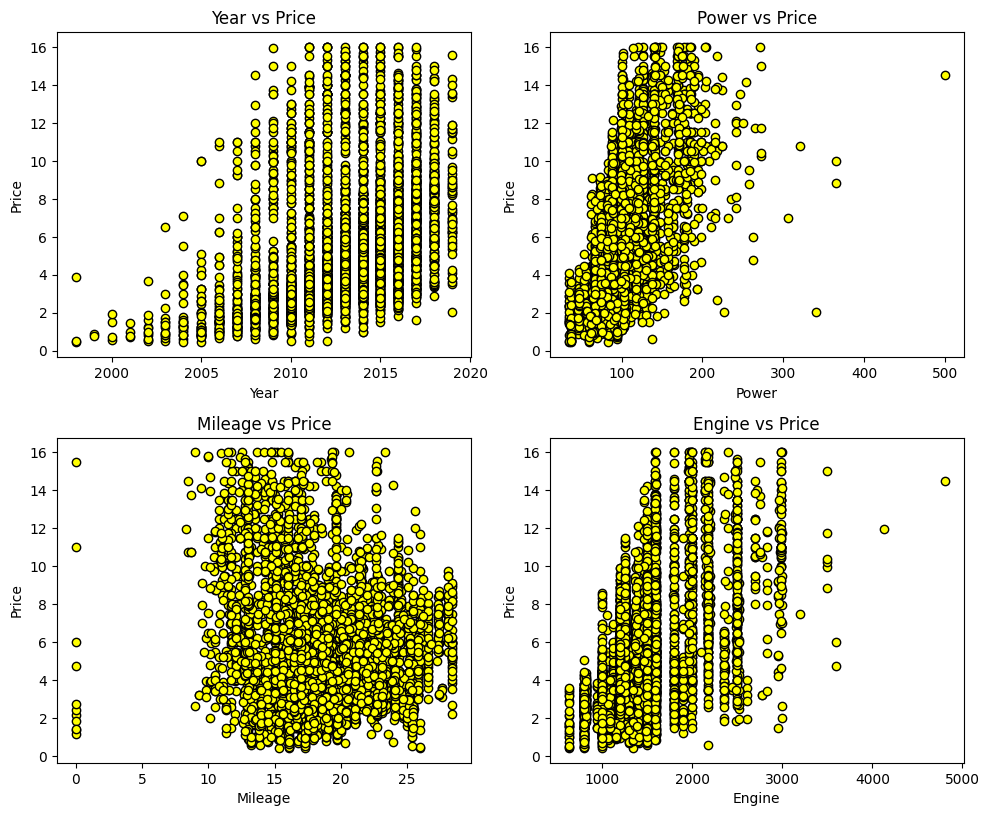

In [14]:
def scatter(x, feature, fig):
    plt.subplot(5,2,fig)
    plt.scatter(np.take(training_data, [x], 1), prices, c='yellow', edgecolors='black')
    plt.title(feature.capitalize() + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(feature.capitalize())

plt.figure(figsize=(10,20))

scatter(0, features[0], 1)
scatter(4, features[4], 2)
scatter(2, features[2], 3)
scatter(3, features[3], 4)

plt.tight_layout()
